# **Logistic Regression & EDA on Kickstarter Projects**
    Dep  : Department of E-Business - Undergraduate, AJOU School of Business, Ajou University
    Code : 201823869 
    Name : seongwoo Cho

<br>

#### **INDEX** 

&nbsp;&nbsp;&nbsp; **2-1. EDA & Pre-processing**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Dealing with missing values <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Removing whitespace of col names <br><br>

&nbsp;&nbsp;&nbsp; **2-2. Generating dummies** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -  Drop all the projects unfinished <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Generate dummies <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Convert the Dependent variable's values to [0,1] <br>

&nbsp;&nbsp;&nbsp; **2-3. Logistic Regression : Model Building** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Splitting into train and test sets <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Building Logistic Regression model <br><br>
&nbsp;&nbsp;&nbsp; **2-4. Model Evaluation** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Confusion Matrix <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - accuracy & precision <br><br>
&nbsp;&nbsp;&nbsp; **2-5. Suggestions for improving**
<br><br><br>

---

<br><br>

# **Summary**
The main purpose of this notebook is building a Logistic regression model for predicting 'DV:state(successful or failed') by using the other variables.<br>
It includes EDA, Cleaning, Building Model, Model Evaluation, and Suggestions for improving the model.
<br><br>

## *Preparing*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_ks = pd.read_csv('../input/kickstarter-projects/ks-projects-201612.csv',encoding='latin_1',low_memory=False)
df_ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


<br>

# **2-1. EDA & Pre-processing**

**Data** : ks-projects-201612 is the data representing '2016 kickstarter Projects'. <br>
It has columns including Id, name, category, main category ...state.

<br>

## *(1) Head observations*

In [2]:
df_ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


<br>

## *(2) Information*
Unnamed: 13, Unnamed: 14, Unnamed: 15, Unnamed: 16 are useless and need to be removed. <br>
Also, most of variables represented in object type should be converted to proper data types like numeric or categorical.

In [3]:
df_ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              323750 non-null  int64  
 1   name            323746 non-null  object 
 2   category        323745 non-null  object 
 3   main_category   323750 non-null  object 
 4   currency        323750 non-null  object 
 5   deadline        323750 non-null  object 
 6   goal            323750 non-null  object 
 7   launched        323750 non-null  object 
 8   pledged         323750 non-null  object 
 9   state           323750 non-null  object 
 10  backers         323750 non-null  object 
 11  country         323750 non-null  object 
 12  usd pledged     319960 non-null  object 
 13  Unnamed: 13     625 non-null     object 
 14  Unnamed: 14     12 non-null      object 
 15  Unnamed: 15     4 non-null       object 
 16  Unnamed: 16     1 non-null       float64
dtypes: float64

### *(2+) Processing : Drop useless columns*

In [4]:
df_ks.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'], axis=1, inplace=True)
df_ks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              323750 non-null  int64 
 1   name            323746 non-null  object
 2   category        323745 non-null  object
 3   main_category   323750 non-null  object
 4   currency        323750 non-null  object
 5   deadline        323750 non-null  object
 6   goal            323750 non-null  object
 7   launched        323750 non-null  object
 8   pledged         323750 non-null  object
 9   state           323750 non-null  object
 10  backers         323750 non-null  object
 11  country         323750 non-null  object
 12  usd pledged     319960 non-null  object
dtypes: int64(1), object(12)
memory usage: 32.1+ MB


### *(2++) Processing : Convert data types*

In [5]:
df_ks[['goal ','pledged ','backers ','usd pledged ']] = df_ks[['goal ','pledged ','backers ','usd pledged ']].apply(pd.to_numeric,errors='coerce')

df_ks[['goal ','pledged ','backers ','usd pledged ']]

,goal,pledged,backers,usd pledged
0,1000.0,0.0,0.0,0.0
1,45000.0,220.0,3.0,220.0
2,5000.0,1.0,1.0,1.0
3,19500.0,1283.0,14.0,1283.0
4,50000.0,52375.0,224.0,52375.0
...,...,...,...,...
323745,50000.0,25.0,1.0,25.0
323746,1500.0,155.0,5.0,155.0
323747,15000.0,20.0,1.0,20.0
323748,15000.0,200.0,6.0,200.0


<br>

## *(3) Checking missing values*

In [6]:
df_ks.isnull().sum()

ID                   0
name                 4
category             5
main_category        0
currency             0
deadline             0
goal               632
launched             0
pledged            624
state                0
backers            623
country              0
usd pledged       4413
dtype: int64

### *(3+) Processing : Drop missing values*

In [7]:
df_ks = df_ks.dropna()
df_ks.isnull().sum()

ID                0
name              0
category          0
main_category     0
currency          0
deadline          0
goal              0
launched          0
pledged           0
state             0
backers           0
country           0
usd pledged       0
dtype: int64

<br>

## *(4) Checking column names*
Id, name, .., usd pledged, all columns have a whitespace, which might bring about some errors.

In [8]:
print(df_ks.columns.values)

['ID ' 'name ' 'category ' 'main_category ' 'currency ' 'deadline '
 'goal ' 'launched ' 'pledged ' 'state ' 'backers ' 'country '
 'usd pledged ']


### *(4+) Processing : Remove whiteSpaces in colnames*

In [9]:
newColnames = []
for i in range(len(df_ks.columns.values)) :
    newColnames.append(df_ks.columns.values[i][:len(df_ks.columns.values[i])-1])

df_ks.columns = newColnames
df_ks.head()
print(df_ks.columns)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged'],
      dtype='object')


<br>

## *(5) Bar chart : Currecy counts*
USD is a major currency in the kickstarter projects.

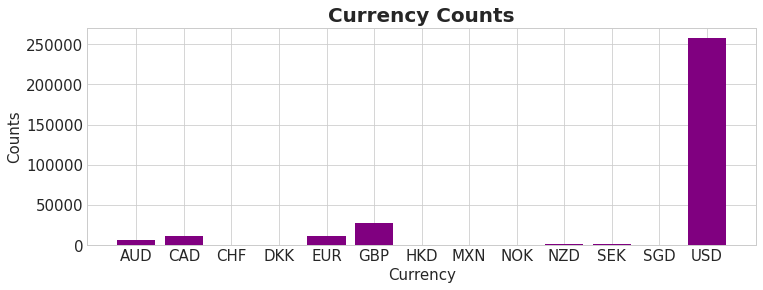

In [10]:
ks_cnt_cur= df_ks.groupby('currency')['currency'].count()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,4))

plt.bar(ks_cnt_cur.index.values,ks_cnt_cur.values,color='purple')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Currency Counts',fontsize=20,fontweight='bold')
plt.xlabel('Currency',fontsize=15)
plt.ylabel('Counts',fontsize=15)

plt.show()

<br>

## *(6) Bar chart : Country counts*
US is the major country in the kickstarter projects.

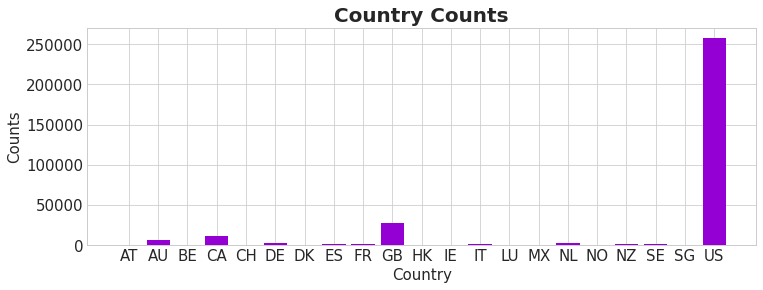

In [11]:
ks_cnt_country= df_ks.groupby('country')['country'].count()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,4))

plt.bar(ks_cnt_country.index.values,ks_cnt_country.values,color='darkviolet')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Country Counts',fontsize=20,fontweight='bold')
plt.xlabel('Country',fontsize=15)
plt.ylabel('Counts',fontsize=15)

plt.show()

<br>

## *(7) Pie chart : States*
Most projects were failed.

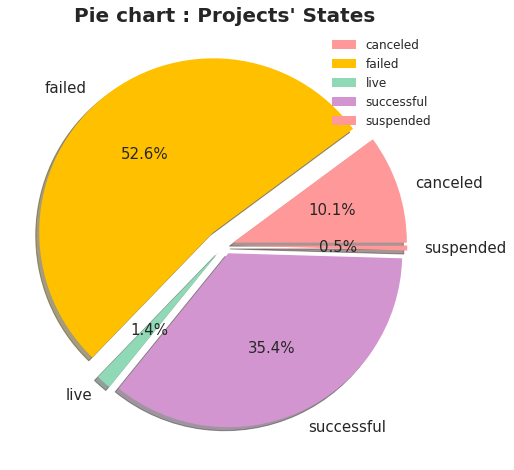

In [12]:
ks_cnt_st= df_ks.groupby('state')['state'].count()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,8))

colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
explode= [0.05,0.1,0.05,0.05,0.05]

plt.pie(ks_cnt_st.values,labels=ks_cnt_st.index.values, 
        autopct='%.1f%%', 
        explode=explode, 
        shadow=True,
        colors=colors,
        textprops={'fontsize':15})
plt.title('Pie chart : Projects\' States',fontsize=20,fontweight='bold')
plt.legend(loc='upper right', fontsize=12)


plt.show()

<br>

## *(8) Counted Bar Chart having splited legends by main categories*
Film & video , Music have the most frequencies not only in successful but also failed.

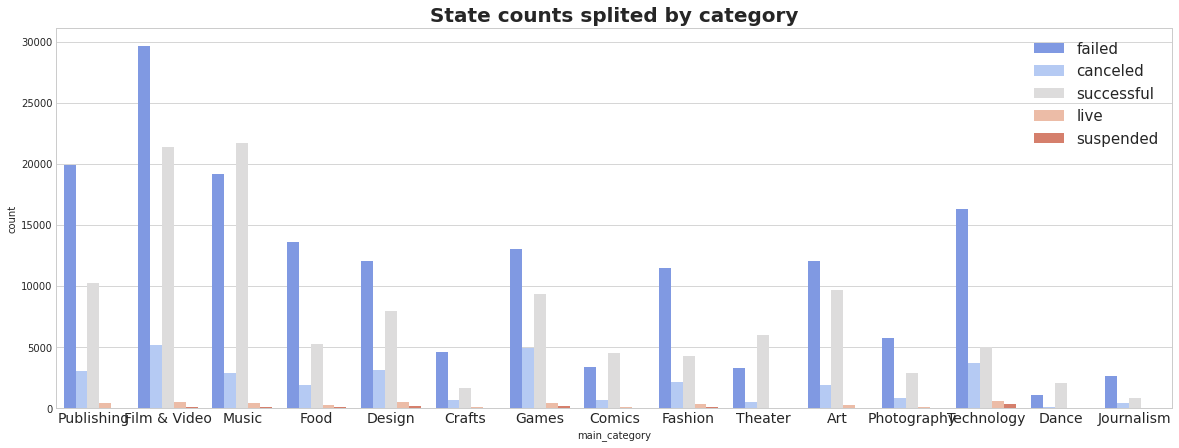

In [13]:
plt.figure(figsize=(20,7))

palette1 = sns.color_palette('coolwarm',5)
sns.countplot(data=df_ks,x='main_category', hue='state',palette=palette1)

plt.title('State counts splited by category',fontsize=20,fontweight='bold')
plt.xticks(fontsize=14)
plt.legend(loc='upper right',fontsize=15)

<br>

# **2-2. Generating dummies**

## *(1) Drop all the projects unfinished*
I'll drop the three state values live, suspended, canceled for predicting successful cases.

In [14]:
df_ks_p = df_ks
df_ks_p.drop(df_ks_p.loc[df_ks_p['state'] == 'live'].index, inplace=True)
df_ks_p.drop(df_ks_p.loc[df_ks_p['state'] == 'suspended'].index, inplace=True)
df_ks_p.drop(df_ks_p.loc[df_ks_p['state'] == 'canceled'].index, inplace=True)

print(df_ks_p['state'].value_counts())

failed        168113
successful    112976
Name: state, dtype: int64


<br>

## *(2) Generate dummies*

In [15]:
df_ks_pd = pd.get_dummies(data=df_ks_p, columns=['main_category','country','currency'],drop_first=True)
# df_ks_pd = pd.get_dummies(data=df_ks_p, columns=['country','currency'],drop_first=True)
df_ks_pd.head()

,ID,name,category,deadline,goal,launched,pledged,state,backers,usd pledged,...,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1000002330,The Songs of Adelaide & Abullah,Poetry,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,1000004038,Where is Hank?,Narrative Film,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,220.0,...,0,0,0,0,0,0,0,0,0,1
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,1000014025,Monarch Espresso Bar,Restaurants,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224.0,52375.0,...,0,0,0,0,0,0,0,0,0,1
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,2014-12-21 18:30:44,1000.0,2014-12-01 18:30:44,1205.0,successful,16.0,1205.0,...,0,0,0,0,0,0,0,0,0,1


<br>

## *(3) Convert the Dependent Variable's values to [0,1]*

'state''s values should be replaced to [0,1] for building a Logistic Regression model.

In [16]:
df_ks_pd.loc[df_ks_pd['state'] == 'failed','state'] = 0
df_ks_pd.loc[df_ks_pd['state'] == 'successful','state'] = 1

df_ks_pd['state'] = df_ks_pd['state'].astype('int64')
print(df_ks_pd['state'].value_counts())


0    168113
1    112976
Name: state, dtype: int64


<br>

## *(4) Drop useless columns for a logistic regression*
I tested many cases, recursively, by using various sets of features for training & predicting <br>and I figured out that 'goal' feature causes overfitting problems.

In [17]:
# ks_pd= df_ks_pd.drop(['ID','name','category','country','currency','deadline','launched'],axis=1) # The collection of features caused an overfitting => I assumed 'goal' feature caused the overfitting

# ks_pd = df_ks_pd.drop(['ID','usd pledged','pledged','goal','name','category','country','currency','deadline','launched'],axis=1) # precision 0.80/0.88, accuracy 0.82 but low recall 0.65

ks_pd = df_ks_pd.drop(['ID','name','goal','category','deadline','launched'],axis=1)

# ks_pd= df_ks_pd.drop(['ID','name','category','main_category','deadline','launched'],axis=1) # # The collection of features caused an overfitting
print(ks_pd.columns.values)


['pledged' 'state' 'backers' 'usd pledged' 'main_category_Comics'
 'main_category_Crafts' 'main_category_Dance' 'main_category_Design'
 'main_category_Fashion' 'main_category_Film & Video' 'main_category_Food'
 'main_category_Games' 'main_category_Journalism' 'main_category_Music'
 'main_category_Photography' 'main_category_Publishing'
 'main_category_Technology' 'main_category_Theater' 'country_AU'
 'country_BE' 'country_CA' 'country_CH' 'country_DE' 'country_DK'
 'country_ES' 'country_FR' 'country_GB' 'country_HK' 'country_IE'
 'country_IT' 'country_LU' 'country_MX' 'country_NL' 'country_NO'
 'country_NZ' 'country_SE' 'country_SG' 'country_US' 'currency_CAD'
 'currency_CHF' 'currency_DKK' 'currency_EUR' 'currency_GBP'
 'currency_HKD' 'currency_MXN' 'currency_NOK' 'currency_NZD'
 'currency_SEK' 'currency_SGD' 'currency_USD']


<br>

# **2-3. Building a Logistic Regression model**

## *(1) Split into train,test*

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ks_pd.drop('state',axis=1),
                                                          ks_pd['state'], test_size=0.25,
                                                          random_state=101)

<br>

## *(2) Training & predicting*

In [19]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
probs = logmodel.predict_proba(X_test)

<br>

# **2-4. Model Evaluation**

## *(1) Confusion Matrix*

In [20]:
from sklearn.metrics import confusion_matrix

cf_mat = confusion_matrix(y_test,predictions)
print(cf_mat)


[[39458  2563]
 [11755 16497]]


### *(1+) Visualized Confusion Matrix*

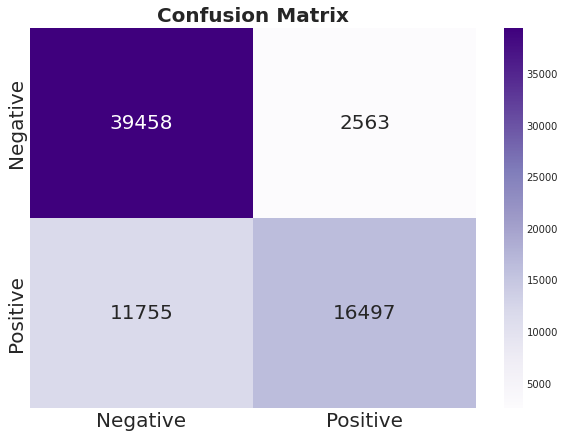

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(cf_mat, annot=True,
            xticklabels=['Negative','Positive'],
            yticklabels=['Negative','Positive'],
            cmap='Purples',
            fmt='g',
            annot_kws={'size':20})
plt.title('Confusion Matrix',fontsize=20,fontweight='bold')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.show()

Total : 70273

* ***TN( True Negative ) : 39458***
* ***FP( False Positive ) : 2563***
* ***FN( False Negative ) : 11755***
* ***TP( True Positive) : 16497***

<br>

## *(2) Prediction & Accuracy Score*

In [22]:
# Accuracy Score
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.77      0.94      0.85     42021
           1       0.87      0.58      0.70     28252

    accuracy                           0.80     70273
   macro avg       0.82      0.76      0.77     70273
weighted avg       0.81      0.80      0.79     70273



* ***Precision : 0.82*** 
* ***Accuracy  : 0.80***

<br><br>

# **2-5. Suggestions for improving the model's performance**

*1. Including \'goal\' feature will increase the overall indices for an evaluation, but It causes overfitting problems in my tests.* <br><br>
*2. Extracting year feature from \'deadline\' & \'launced\' and utilizing those might be helpful to improve precision & accuracy, but it also involves a hazard to an overfitting issue.* <br><br>
*3. Removing outliers will be a nice troubleshooter for improving the model\'s performance.* <br><br>
*4. Adjusting a threshold for improving a precision, but the relationship between a precision and an accuracy is trade-off. If a precision goes up, accuracy will go down, and vice versa.* <br><br>

<br>